In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 43kB/s 


In [3]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

In [4]:
stock = pd.read_csv("/content/drive/My Drive/Colab Notebooks/finaldataset.csv")

In [5]:
stock['publish_date'] = pd.to_datetime(stock['publish_date']) 

In [6]:
stock.set_index('publish_date', inplace = True)

In [7]:
stock.head(5)

,week_of_year,month,pct_week_of_year,pol_s2_rw3,pol_s3_rw7,pol_s4_rw14,lag1_Close,lag_close_rw30,lag_close_ew,lag_close_diff,Close
publish_date,,,,,,,,,,,
2001-06-19,25,6,0.000819,-0.012048,-0.000235,-0.003545,3406.050049,3555.926343,3818.973250,-4.899902,3410.949951
2001-06-20,25,6,0.000819,-0.014315,-0.003466,-0.004068,3405.639893,3550.505339,3815.557272,-0.410156,3406.050049
2001-06-21,25,6,0.000819,-0.004011,-0.004303,-0.006917,3381.760010,3544.571672,3812.001557,-23.879883,3405.639893
2001-06-22,25,6,0.000819,0.003311,-0.003433,-0.007758,3318.669922,3536.229671,3807.990731,-63.090088,3381.760010
2001-06-25,26,6,0.001859,0.005231,-0.004189,-0.004998,3407.320068,3530.575008,3804.759516,88.650146,3318.669922


In [8]:
train_size = int(len(stock) * 0.9)
test_size = len(stock) - train_size
train, test = stock.iloc[0:train_size], stock.iloc[train_size:len(stock)]

In [9]:
(len(train), len(test))

(4272, 475)

In [10]:
from sklearn.preprocessing import RobustScaler

feature_col = ['week_of_year', 'month', 'pct_week_of_year', 'pol_s2_rw3', 'pol_s3_rw7', 'pol_s4_rw14', 'lag1_Close', 'lag_close_rw30', 'lag_close_ew', 'lag_close_diff']

feature_transformer = RobustScaler()
target_transformer = RobustScaler()

feature_transformer = feature_transformer.fit(stock[feature_col].to_numpy())
target_transformer = target_transformer.fit(stock[['Close']])

train.loc[:, feature_col] = feature_transformer.transform(train[feature_col].to_numpy())
train['Close'] = target_transformer.transform(train[['Close']])

test.loc[:, feature_col] = feature_transformer.transform(test[feature_col].to_numpy())
test['Close'] = target_transformer.transform(test[['Close']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [11]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [12]:
time_steps = 30

X_train, y_train = create_dataset(train, train.Close, time_steps)
X_test, y_test = create_dataset(test, test.Close, time_steps)

print(X_train.shape, y_train.shape)

(4242, 30, 11) (4242,)


In [64]:
def get_loss(mode = ''):
  model = keras.Sequential()
  model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=20, input_shape=(30, 11)), merge_mode=mode))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.Dense(units=1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.1, shuffle=False, verbose=0)
  x = history.history['loss']
  return x

In [68]:
results = pd.DataFrame()
results['sum'] = get_loss('sum')
results['average'] = get_loss('ave')
results['concat'] = get_loss('concat')
results['muliplication'] = get_loss('mul')

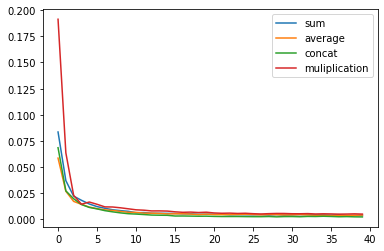

In [69]:
results.plot()

In [70]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=20, input_shape=(30, 11)), merge_mode='concat'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [71]:
history = model.fit(
    X_train, y_train, 
    epochs=40, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/40
120/120 [==============================] - 2s 13ms/step - loss: 0.1150 - val_loss: 0.0308
Epoch 2/40
120/120 [==============================] - 1s 6ms/step - loss: 0.0371 - val_loss: 0.0173
Epoch 3/40
120/120 [==============================] - 1s 7ms/step - loss: 0.0231 - val_loss: 0.0092
Epoch 4/40
120/120 [==============================] - 1s 7ms/step - loss: 0.0187 - val_loss: 0.0080
Epoch 5/40
120/120 [==============================] - 1s 7ms/step - loss: 0.0144 - val_loss: 0.0059
Epoch 6/40
120/120 [==============================] - 1s 6ms/step - loss: 0.0119 - val_loss: 0.0043
Epoch 7/40
120/120 [==============================] - 1s 6ms/step - loss: 0.0099 - val_loss: 0.0040
Epoch 8/40
120/120 [==============================] - 1s 6ms/step - loss: 0.0089 - val_loss: 0.0033
Epoch 9/40
120/120 [==============================] - 1s 6ms/step - loss: 0.0076 - val_loss: 0.0030
Epoch 10/40
120/120 [==============================] - 1s 7ms/step - loss: 0.0062 - val_loss: 0.003

In [72]:
y_pred = model.predict(X_test)

In [73]:
y_train_inv = target_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = target_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = target_transformer.inverse_transform(y_pred)

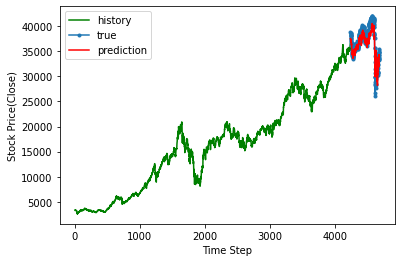

In [74]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Stock Price(Close)')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [75]:
from sklearn import metrics
def scores(y, y_):
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))

In [76]:
scores(y_test, y_pred)

MAPE:17.583441591241307
